In [13]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statsmodels.api as sm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


Example:   This is an investigation into the formulation of synthetic fibers that are used to make cloth. The response is tensile strength, the strength of the fiber. The experimenter wants to determine the best level of the cotton in terms of percent, to achieve the highest tensile strength of the fiber. Therefore, we have a single quantitative factor, the percent of cotton combined with synthetic fabric fibers.

The five treatment levels of percent cotton are evenly spaced from 15% to 35%. We have five replicates, five runs on each of the five cotton weight percentages.

In [14]:
cotton = pd.read_csv('cotton_weight.csv')
print(cotton)

    Cotton_Weight_%  Observations
0              15.0           7.0
1              20.0          12.0
2              25.0          14.0
3              30.0          19.0
4              35.0           7.0
5              15.0           7.0
6              20.0          17.0
7              25.0          19.0
8              30.0          25.0
9              35.0          10.0
10             15.0          15.0
11             20.0          12.0
12             25.0          19.0
13             30.0          22.0
14             35.0          11.0
15             15.0          11.0
16             20.0          18.0
17             25.0          18.0
18             30.0          19.0
19             35.0          15.0
20             15.0           9.0
21             20.0          18.0
22             25.0          18.0
23             30.0          23.0
24             35.0          11.0


In [15]:
cotton["Cotton_Weight_%"]=cotton["Cotton_Weight_%"].astype("category")

**read in the dataset**

putting a # allows you to annotate with notes; having the # tells python to not read this line as code

In [16]:
# Plot the data to visualize
#ax=sns.boxplot(x=cotton["Cotton_Weight_%"], y= cotton["Observations"], data=cotton,showmeans=True,palette="Greys")
#ax=sns.swarmplot(x=cotton["Cotton_Weight_%"], y= cotton["Observations"], data=cotton)
#plt.xlabel("Cotton Weight %")
#plt.ylabel("Strength")

What assumptions do you have to review?

In [17]:
cotton.describe()

,Observations
count,25.000000
mean,15.040000
std,5.151699
min,7.000000
25%,11.000000
50%,15.000000
75%,19.000000
max,25.000000


The ANOVA table decomposes the variance into the following component sum of squares:

- Total sum of squares. The degrees of freedom for this entry is the number of observations minus one.

- Sum of squares for the factor. The degrees of freedom for this entry is the number of levels minus one. The mean square is the sum of squares divided by the number of degrees of freedom.

- Residual sum of squares. The degrees of freedom is the total degrees of freedom minus the factor degrees of freedom. The mean square is the sum of squares divided by the number of degrees of freedom.

The sums of squares summarize how much of the variance in the data (total sum of squares) is accounted for by the factor effect (batch sum of squares) and how much is random error (residual sum of squares). Ideally, we would like most of the variance to be explained by the factor effect.

The ANOVA table provides a formal F test for the factor effect. For our example, we are testing the following hypothesis.

      H0: All individual batch means are equal.
      Ha: At least one batch mean is not equal to the others.

**read in the dataset**

putting a # allows you to annotate with notes; having the # tells python to not read this line as code

In [18]:
#cottonG = pd.read_csv('CottonGrouped.csv')
#print(cottonG)

In [19]:
stats.f_oneway(cottonG["15%"],cottonG["20%"],cottonG["25%"],cottonG["30%"],cottonG["35%"])

NameError: name 'cottonG' is not defined

In [20]:
TotalSS= np.sum((cotton["Observations"]-cotton["Observations"].mean())**2)
TotalSS

636.96

In [21]:
cottonGMean=cottonG.mean()
cottonGMean

NameError: name 'cottonG' is not defined

In [22]:
cottonG.describe()

NameError: name 'cottonG' is not defined

In [23]:
cottonG.var()

NameError: name 'cottonG' is not defined

In [24]:
cotton["Observations"].mean()

15.04

In [25]:
(cottonGMean-(cotton["Observations"].mean()))**2

NameError: name 'cottonGMean' is not defined

In [26]:
BetweenSS=np.sum( (cottonGMean-(cotton["Observations"].mean())) **2)*5
BetweenSS

NameError: name 'cottonGMean' is not defined

In [27]:
MSBetween=BetweenSS/4
MSBetween

NameError: name 'BetweenSS' is not defined

In [28]:
WithinSS_1=np.sum((cottonG["15%"]-np.mean(cottonG["15%"]))**2)
WithinSS_2=np.sum((cottonG["20%"]-np.mean(cottonG["20%"]))**2)
WithinSS_3=np.sum((cottonG["25%"]-np.mean(cottonG["25%"]))**2)
WithinSS_4=np.sum((cottonG["30%"]-np.mean(cottonG["30%"]))**2)
WithinSS_5=np.sum((cottonG["35%"]-np.mean(cottonG["35%"]))**2)
WithinSS=(WithinSS_1+WithinSS_2+WithinSS_3+WithinSS_4+WithinSS_5)
WithinSS

NameError: name 'cottonG' is not defined

In [29]:
MSWithin=WithinSS/20
MSWithin

NameError: name 'WithinSS' is not defined

In [30]:
F_statistic=MSBetween/MSWithin
F_statistic

NameError: name 'MSBetween' is not defined

The F statistic is the batch mean square divided by the residual mean square. 

This statistic follows an F distribution with (k-1) and (N-k) degrees of freedom. For our example, the critical F value (upper tail) for α = 0.05, (k-1) = 4, and (N-k) = 20 is XXXXXX. 

Since the F statistic, XXXXXX, is greater than the critical value, we conclude that there is a significant batch effect at the 0.05 level of significance.

Or find the exact p-value associated with the test statistic  
:  cdf(x, dfn, dfd, loc=0, scale=1)

In [31]:
from scipy.stats import f

In [32]:
f.ppf(0.95,4,20)

2.8660814020156584

In [33]:
1-f.cdf(F_statistic,4,20)

NameError: name 'F_statistic' is not defined

check your model assumptions

In [34]:
scipy.stats.levene(cottonG["15%"],cottonG["20%"],cottonG["25%"],cottonG["30%"],cottonG["35%"])

NameError: name 'cottonG' is not defined

In [35]:
cottonG["15%"].sort_values()
cottonG["20%"].sort_values()
cottonG["25%"].sort_values()
cottonG["25%"].sort_values()
cottonG["30%"].sort_values()
fig2,ax2=plt.subplots(nrows=3,ncols=2,figsize=(10,4))
sm.qqplot(cottonG["15%"],line='45',loc=np.mean(cottonG["15%"]),scale=np.std(cottonG["15%"],ddof=1),ax=ax2[0,0])
sm.qqplot(cottonG["20%"],line='45',loc=np.mean(cottonG["20%"]),scale=np.std(cottonG["20%"],ddof=1),ax=ax2[0,1])
sm.qqplot(cottonG["25%"],line='45',loc=np.mean(cottonG["25%"]),scale=np.std(cottonG["25%"],ddof=1),ax=ax2[1,0])
sm.qqplot(cottonG["30%"],line='45',loc=np.mean(cottonG["30%"]),scale=np.std(cottonG["30%"],ddof=1),ax=ax2[1,1])
sm.qqplot(cottonG["35%"],line='45',loc=np.mean(cottonG["35%"]),scale=np.std(cottonG["35%"],ddof=1),ax=ax2[2,0])
plt.show()

NameError: name 'cottonG' is not defined

Once we have determined that there is a significant batch effect, we might be interested in comparing individual batch means. The batch means and the standard errors of the batch means provide some information about the individual batches. However, we may want to employ multiple comparison methods for a more formal analysis.

n choose k:  XXXXXXX pairwise comparisons

Tukeys test (Honest Significant Difference) is a single-step multiple comparison procedure and statistical test. It can be used to find means that are significantly different from each other.

It compares all possible pairs of means, and is based on a studentized range distribution (q :this distribution is similar to the distribution of t from the t-test).

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [37]:
mult_comp=pairwise_tukeyhsd(endog=cotton["Observations"], groups=cotton['Cotton_Weight_%'], alpha=0.05)
print(mult_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  15.0   20.0      5.6 0.0385   0.227 10.973   True
  15.0   25.0      7.8 0.0026   2.427 13.173   True
  15.0   30.0     11.8    0.0   6.427 17.173   True
  15.0   35.0      1.0 0.9798  -4.373  6.373  False
  20.0   25.0      2.2 0.7372  -3.173  7.573  False
  20.0   30.0      6.2 0.0189   0.827 11.573   True
  20.0   35.0     -4.6 0.1163  -9.973  0.773  False
  25.0   30.0      4.0 0.2101  -1.373  9.373  False
  25.0   35.0     -6.8 0.0091 -12.173 -1.427   True
  30.0   35.0    -10.8 0.0001 -16.173 -5.427   True
---------------------------------------------------


In [38]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(cotton["Observations"], cotton['Cotton_Weight_%'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")
tbl

group1,group2,stat,pval,pval_corr,reject
15.0,20.0,-2.7325,0.0257,0.2575,False
15.0,25.0,-4.4301,0.0022,0.022,True
15.0,30.0,-6.2191,0.0003,0.0025,True
15.0,35.0,-0.5077,0.6254,1.0,False
20.0,25.0,-1.3101,0.2265,1.0,False
20.0,30.0,-3.4027,0.0093,0.0932,False
20.0,35.0,2.4244,0.0416,0.4156,False
25.0,30.0,-2.6846,0.0277,0.2773,False
25.0,35.0,4.3007,0.0026,0.0261,True
30.0,35.0,6.2354,0.0002,0.0025,True


In [39]:
stats.ttest_ind(cottonG["15%"],cottonG["20%"])

NameError: name 'cottonG' is not defined

# General linear model

The general linear model (GLM) is the conventional linear regression model for a continuous response variable given continuous and/or categorical predictors. It includes simple linear regression, multiple linear regression, as well as ANOVA. 

In [41]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

**read in the dataset**

putting a # allows you to annotate with notes; having the # tells python to not read this line as code

In [42]:
#cottonN = pd.read_csv('cotton_weightN.csv')
#print(cottonN)

In [43]:
#fit the simple linear regression model
model=ols('Observations~Cotton_Weight',data=cottonN)
results=model.fit()
print(results.summary2())

NameError: name 'cottonN' is not defined

In [44]:
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(results)
print(anova_results)

NameError: name 'results' is not defined

In [45]:
model2=ols('Observations~Cotton_Weight+I(Cotton_Weight*Cotton_Weight)+I(Cotton_Weight*Cotton_Weight*Cotton_Weight)',data=cottonN)
results2=model2.fit()
print(results2.summary2())

NameError: name 'cottonN' is not defined

In [46]:
from statsmodels.stats.anova import anova_lm
anova_results2 = anova_lm(results2)
anova_results2

NameError: name 'results2' is not defined

**fill in the XXXXX marks**

NameError: name 'cottonN' is not defined

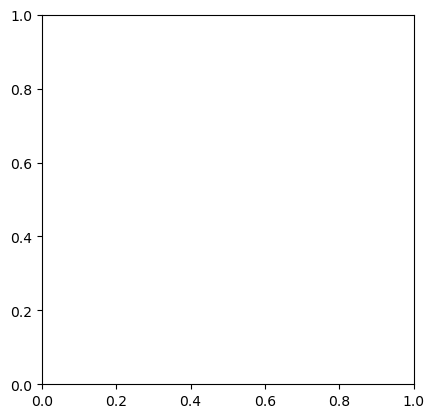

In [51]:
# ** fill in the XXXXX marks **
fig=plt.figure(figsize=plt.figaspect(1)*1)
ax=fig.add_subplot(111)
sns.lineplot(x=cottonN["Cotton_Weight"],y=results1.fittedvalues.values,color="orange")
sns.regplot(x=cottonN["Cotton_Weight"],y=cottonN["Observations"],order=XXXXXX,data=cottonN,color="blue",ci=None)
sns.regplot(x=cottonN["Cotton_Weight"],y=cottonN["Observations"],order=XXXXXX,data=cottonN,color="red",ci=None)
sns.regplot(x=cottonN["Cotton_Weight"],y=cottonN["Observations"],order=XXXXXX,data=cottonN,color="green",ci=None)

Check assumptions

NameError: name 'cottonN' is not defined

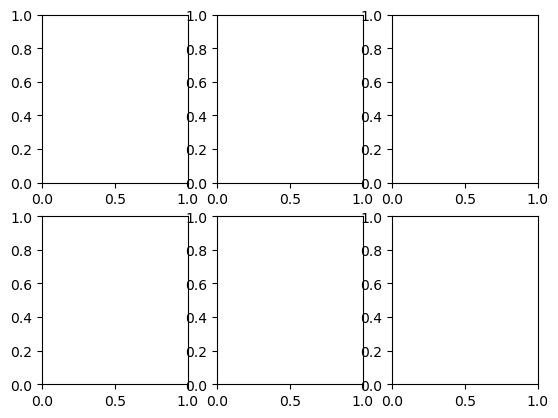

In [48]:
figure2, axis2 = plt.subplots(nrows=2, ncols=3)
sns.scatterplot(x=cottonN["Cotton_Weight"],y=cottonN["Observations"],data=cottonN,ax=axis2[0,0])
sns.scatterplot(x=cottonN["Cotton_Weight"],y=results2.resid,data=cottonN,ax=axis2[0,1])
sns.scatterplot(x=results2.predict(),y=results2.resid,data=cottonN,ax=axis2[0,2])
sns.lineplot(x=np.arange(0,25,1),y=results2.resid,data=cottonN,ax=axis2[1,0])
sns.histplot(x=results2.resid, stat='count',kde=True,ax=axis2[1,1])
sm.qqplot(results2.resid,line='s',ax=axis2[1,2])
plt.show()